In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train[:6,:]

array([[0.21428571, 0.31111111],
       [0.66666667, 0.0962963 ],
       [0.5       , 0.88148148],
       [0.61904762, 0.17777778],
       [0.92857143, 0.08148148],
       [0.33333333, 0.77777778]])

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
#use Gini index bydefault as a ASM

DecisionTreeClassifier()

In [13]:
score = dtc.score(X_test,y_test)
print("Accuracy of model: ",score)

Accuracy of model:  0.8375


In [17]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[46,  6],
       [ 7, 21]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual values')

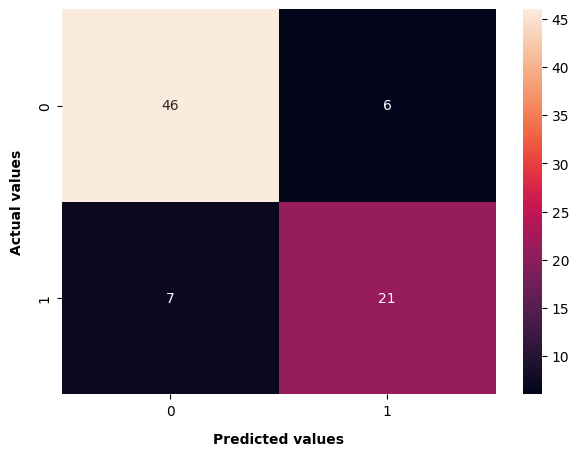

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot = True, xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel("Predicted values", fontweight='bold',labelpad=10)
plt.ylabel("Actual values", fontweight='bold', labelpad=10)

In [25]:
#using Information gain as criterion
dtc_1 = DecisionTreeClassifier(criterion='entropy')
dtc_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
score = dtc_1.score(X_test,y_test)
print('Accuracy of model: ',score)

Accuracy of model:  0.8375


Visualizing the training result

C:\Users\Nishant\AppData\Local\Temp\ipykernel_13132\3081538534.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)


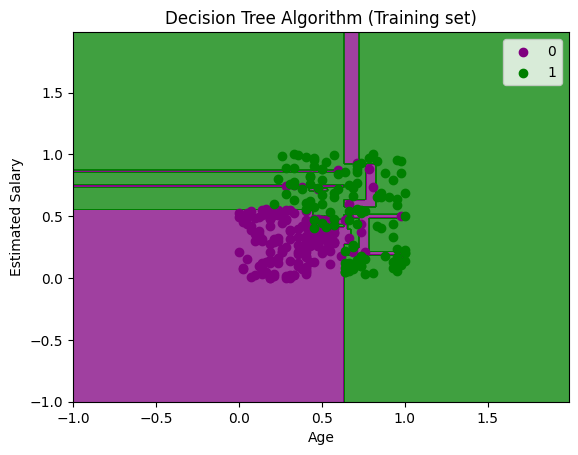

In [29]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, dtc_1.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Decision Tree Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

Visualizing the test result

C:\Users\Nishant\AppData\Local\Temp\ipykernel_13132\1092762253.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)


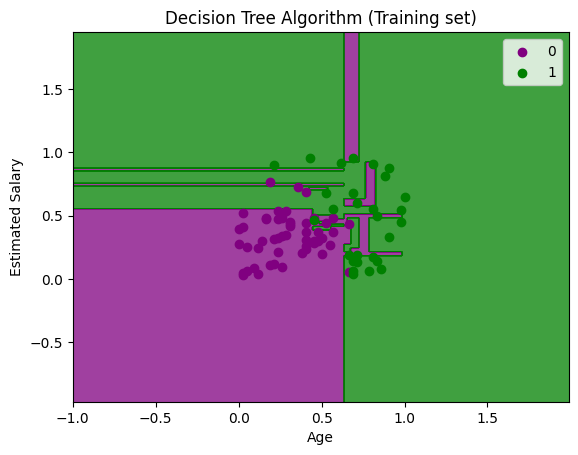

In [31]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, dtc_1.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Decision Tree Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  